(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#assign parameter values

k1=200
k2=1
k3=1
km1=1
km2=1
km3=1 
k5=0.05
km5=0.005
k4=1
km4=1
KM1=1
KM2=1
cheR=1
L=20

In [3]:
#set time_grid for simulation
times=np.linspace(0, 500, 10000) #generate time-grid list

In [4]:
#assign initial condition species vector S=[Am AmL A AL B BP]
#these values were determined by running a previous simulation to steady
#state with L=20.
Sinit=[0.0360,    1.5593,    0.0595 ,   0.3504 ,   0.7356 ,   0.2644]

In [5]:
#declare right-hand-side for original model
def dSdt_original(S,t, Llocal):
    dS=np.zeros(6) #generate a list to store derivatives
    
    #assign state variables
    Am=S[0]
    AmL=S[1]
    A=S[2]
    AL=S[3]
    B=S[4]
    BP=S[5]
    
    # Llocal=L
    # #set up time-varying ligan profile
    # if (t>10):
    #     Llocal=60
    # if (t>30):
    #     Llocal=100

    
    dS[0]=km1*cheR - (k1*BP*Am)/(KM1 + Am) - k3*Am*Llocal + km3*AmL
    dS[1]=km2*cheR - (k2*BP*AmL)/(KM2 + AmL) + k3*Am*Llocal - km3*AmL
    dS[2]=-km1*cheR + (k1*BP*Am)/(KM1 + Am) - k4*A*Llocal + km4*AL
    dS[3]=-km2*cheR + (k2*BP*AmL)/(KM2 + AmL) + k4*A*Llocal - km4*AL
    dS[4]=-(k5*Am*B) +  (km5*BP)
    dS[5]=(k5*Am*B) -  (km5*BP)
    return dS

In [6]:
Am_ss_values = []
L_values = np.linspace(20, 100, num=20)
for l in L_values: 
    S = odeint(dSdt_original, Sinit, times, args=(l,))
    Am_ss = S[-1,0]
    Am_ss_values.append(Am_ss)


In [7]:
L_values

array([ 20.        ,  24.21052632,  28.42105263,  32.63157895,
        36.84210526,  41.05263158,  45.26315789,  49.47368421,
        53.68421053,  57.89473684,  62.10526316,  66.31578947,
        70.52631579,  74.73684211,  78.94736842,  83.15789474,
        87.36842105,  91.57894737,  95.78947368, 100.        ])

In [8]:
Am_ss_values

[0.03599006898803705,
 0.035928642102830956,
 0.03587347165620548,
 0.03582365747516537,
 0.03577846470116807,
 0.03573728449892799,
 0.03569960962667123,
 0.03566501464579888,
 0.03563313961311052,
 0.03560367823449938,
 0.035576367966427755,
 0.03555098369486021,
 0.035527328990123556,
 0.03550523470022974,
 0.03548455203129499,
 0.03546515050418972,
 0.03544691554878578,
 0.035429745533467005,
 0.035413550214637664,
 0.03539824919088159]

(0.01, 0.04)

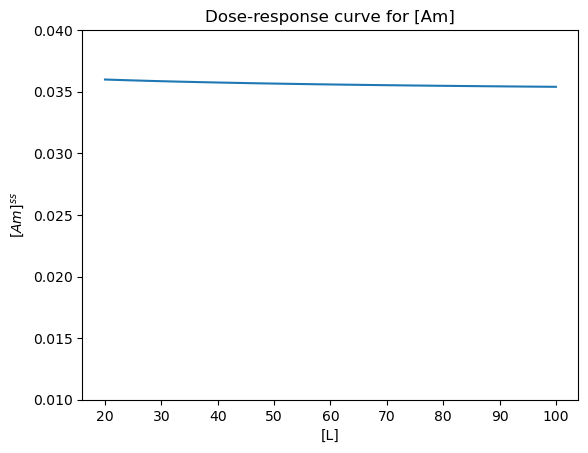

In [9]:
plt.plot(L_values, Am_ss_values)
plt.title("Dose-response curve for [Am]")
plt.xlabel("[L]")
plt.ylabel("$[Am]^{ss}$")
plt.ylim(0.01, 0.04)

(b)

In [10]:
#assign parameter values

k1=200
k2=1
k3=1

km3=1 
k5=0.05
km5=0.005
k4=1
km4=1
KM1=1
KM2=1
cheR=1
# L=20

km1=10
km2=10
kMm1=1
kMm2=1

In [11]:
#set time_grid for simulation
times=np.linspace(0, 500, 10000) #generate time-grid list

In [12]:
#assign initial condition species vector S=[Am AmL A AL B BP]
#these values were determined by running a previous simulation to steady
#state with L=20.
Sinit=[0.0360,    1.5593,    0.0595 ,   0.3504 ,   0.7356 ,   0.2644]

In [13]:
#declare right-hand-side for original model
def dSdt_b(S,t, Llocal):
    dS=np.zeros(6) #generate a list to store derivatives
    
    #assign state variables
    Am=S[0]
    AmL=S[1]
    A=S[2]
    AL=S[3]
    B=S[4]
    BP=S[5]
    
    # Llocal=L
    # #set up time-varying ligan profile
    # if (t>10):
    #     Llocal=60
    # if (t>30):
    #     Llocal=100

    
    dS[0]=km1*cheR*A/(kMm1+A) - (k1*BP*Am)/(KM1 + Am) - k3*Am*Llocal + km3*AmL
    dS[1]=km2*cheR*AL/(kMm2+AL) - (k2*BP*AmL)/(KM2 + AmL) + k3*Am*Llocal - km3*AmL
    dS[2]=-km1*cheR*A/(kMm1+A) + (k1*BP*Am)/(KM1 + Am) - k4*A*Llocal + km4*AL
    dS[3]=-km2*cheR*AL/(kMm2+AL) + (k2*BP*AmL)/(KM2 + AmL) + k4*A*Llocal - km4*AL
    dS[4]=-(k5*Am*B) +  (km5*BP)
    dS[5]=(k5*Am*B) -  (km5*BP)
    return dS

In [14]:
Am_ss_values_b = []
for l in L_values: 
    S = odeint(dSdt_b, Sinit, times, args=(l,))
    Am_ss = S[-1,0]
    Am_ss_values_b.append(Am_ss)


(0.01, 0.04)

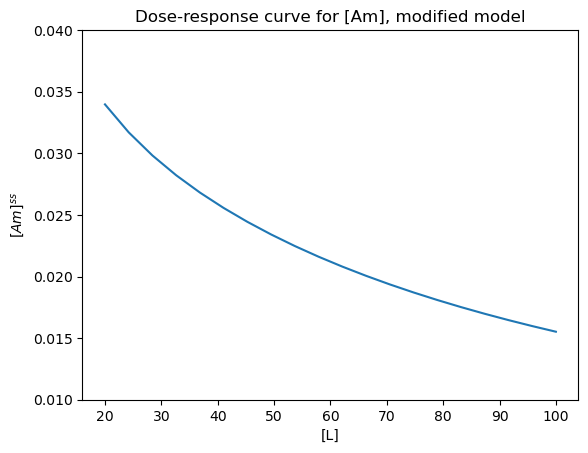

In [15]:
plt.plot(L_values, Am_ss_values_b)
plt.title("Dose-response curve for [Am], modified model")
plt.xlabel("[L]")
plt.ylabel("$[Am]^{ss}$")
plt.ylim(0.01, 0.04)

(c)

In [16]:
#assign parameter values

k1=200
k2=1
k3=1

km3=1 
k5=0.05
km5=0.005
k4=1
km4=1
KM1=1
KM2=1
cheR=1
# L=20

km1=10
km2=10
kMm1=1
kMm2=1

In [17]:
#set time_grid for simulation
times=np.linspace(0, 5000, 100000) #generate time-grid list

In [18]:
#assign initial condition species vector S=[Am AmL A AL B BP]
#these values were determined by running a previous simulation to steady
#state with L=20.
Sinit_c=[0.0360,    1.5593,    0.0595 ,   0.3504 , 0.0360,    1.5593,   0.7356 ,   0.2644]

In [19]:
#declare right-hand-side for original model
def dSdt_c(S,t, Llocal):
    dS=np.zeros(8) #generate a list to store derivatives
    
    #assign state variables
    Am=S[0]
    AmL=S[1]
    A=S[2]
    AL=S[3]

    Amm=S[4]
    AmmL=S[5]

    B=S[6]
    BP=S[7]

    
    # Llocal=L
    # #set up time-varying ligan profile
    # if (t>10):
    #     Llocal=60
    # if (t>30):
    #     Llocal=100

    
    dS[0]=km1*cheR*A/(kMm1+A) - (k1*BP*Am)/(KM1 + Am) - k3*Am*Llocal + km3*AmL - km1*cheR*Am/(kMm1+Am) + (k1*BP*Amm)/(KM1 + Amm)
    dS[1]=km2*cheR*AL/(kMm2+AL) - (k2*BP*AmL)/(KM2 + AmL) + k3*Am*Llocal - km3*AmL - km2*cheR*AmL/(kMm2+AmL) + (k2*BP*AmmL)/(KM2 + AmmL)
    dS[2]=-km1*cheR*A/(kMm1+A) + (k1*BP*Am)/(KM1 + Am) - k4*A*Llocal + km4*AL
    dS[3]=-km2*cheR*AL/(kMm2+AL) + (k2*BP*AmL)/(KM2 + AmL) + k4*A*Llocal - km4*AL

    dS[4]=km1*cheR*Am/(kMm1+Am) - (k1*BP*Amm)/(KM1 + Amm) - k3*Amm*Llocal + km3*AmmL
    dS[5]=km2*cheR*AmL/(kMm2+AmL) - (k2*BP*AmmL)/(KM2 + AmmL) + k3*Amm*Llocal - km3*AmmL

    dS[6]=-(k5*Amm*B) +  (km5*BP)
    dS[7]=(k5*Amm*B) -  (km5*BP)
    return dS

In [20]:
Amm_ss_values_c = []
for l in L_values: 
    S = odeint(dSdt_c, Sinit_c, times, args=(l,))
    Amm_ss = S[-1,4]
    Amm_ss_values_c.append(Amm_ss)


In [21]:
L_values

array([ 20.        ,  24.21052632,  28.42105263,  32.63157895,
        36.84210526,  41.05263158,  45.26315789,  49.47368421,
        53.68421053,  57.89473684,  62.10526316,  66.31578947,
        70.52631579,  74.73684211,  78.94736842,  83.15789474,
        87.36842105,  91.57894737,  95.78947368, 100.        ])

In [22]:
Amm_ss_values_c

[0.04291233769452394,
 0.04152808901537382,
 0.04021157780299315,
 0.038958361084888996,
 0.03776437200039181,
 0.03662601556112448,
 0.03554007708678107,
 0.03450363001358564,
 0.03351397242336383,
 0.03256858438874754,
 0.0316651015656491,
 0.03080129747182058,
 0.029975071673423854,
 0.029184439774656377,
 0.028427531217657728,
 0.027702574040652333,
 0.027007898248565195,
 0.0263419269262145,
 0.02570317203009231,
 0.02509022960879862]

In [23]:
(Am_ss_values_b[-1]-Am_ss_values_b[0]) / Am_ss_values_b[0]

-0.54315256823428

In [24]:
(Amm_ss_values_c[-1]-Amm_ss_values_c[0]) / Amm_ss_values_c[0]

-0.415314313859895

(0.01, 0.05)

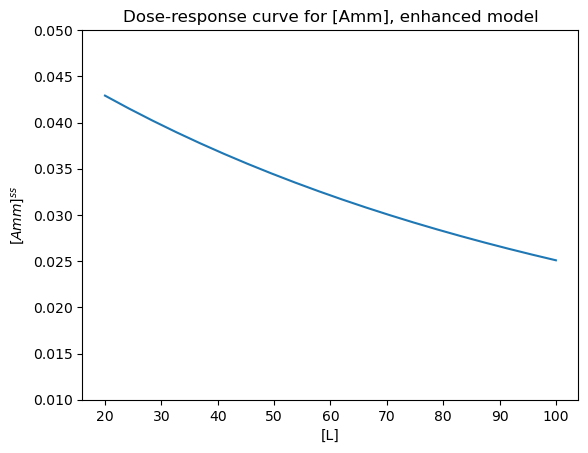

In [25]:
plt.plot(L_values, Amm_ss_values_c)
plt.title("Dose-response curve for [Amm], enhanced model")
plt.xlabel("[L]")
plt.ylabel("$[Amm]^{ss}$")
plt.ylim(0.01, 0.05)
# plt.ylim(0.01, 0.04)